# Assignment 4 Answer

- Unless dictated by the exercise (like in Q1), the point of the code is to generate the visuals, and can therefore be ignored.
- There are some lecture references in this document. They are notes to myself and can be ignored.

In [1]:
from scipy.integrate import odeint
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# pip install phaseportrait
import phaseportrait

## Q1

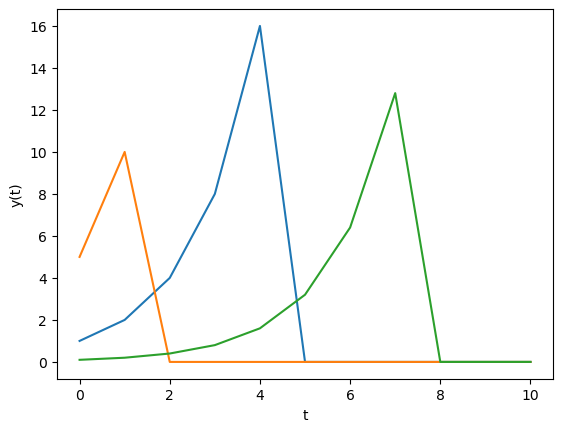

In [2]:
def f(y0, duration):
    y = [y0]
    t = [0]

    for i in range(duration):
        y.append(2*y[i] if y[i] < 10 else 0)
        t.append(t[i] + 1)
    return (t, y)

plt.plot(*f(1, 10))
plt.plot(*f(5, 10))
plt.plot(*f(0.1, 10))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

The system is convergent because it always converges to zero at $t = \infty$, however it is not marginally stable because given an arbitrary maximum output $y_{max} < 10$, there is no $y_0$ such that $y(t) < y_{max}$ for all $t > 0$, and in order for a system to be marginally stable, this must be the case.

## Q2

- Lecture 36 Informal introduction to stability + a mistake to avoid
- Lecture 107 Equilibria for LTI systems

When attempting to stay within $\theta(t) <= \epsilon$ for all $t > 0$, the initial condition $\delta$ must be $\delta <= 2$.

## Q3

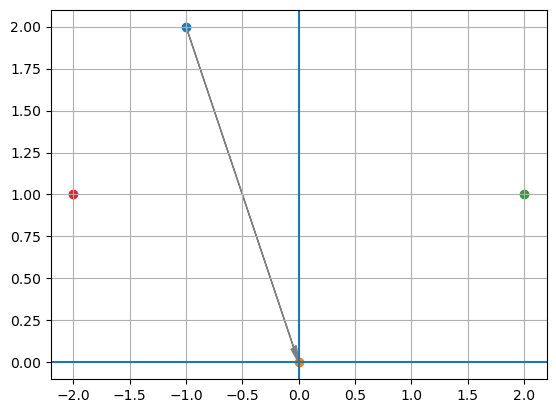

In [3]:
s1 = [0, 0]
s2 = [2, 1]
s3 = [-2, 1]
u1 = np.array([-1, 2])

plt.scatter(*u1)
plt.scatter(*s1)
plt.scatter(*s2)
plt.scatter(*s3)

plt.arrow(*u1, *-u1, head_width=0.05, head_length=0.1, length_includes_head=True, color='gray')

plt.grid()
plt.axhline()
plt.axvline()
plt.show()

Creating the system

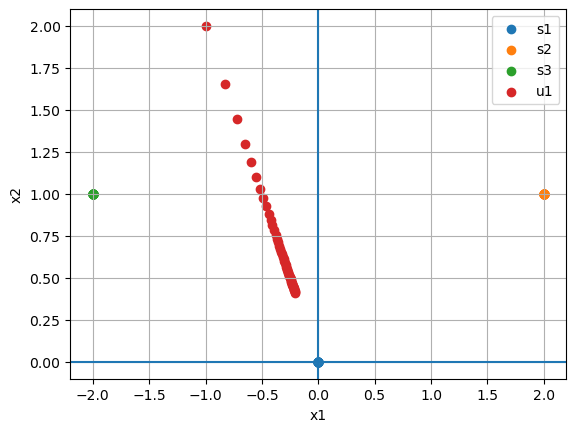

In [4]:
def model(x, t):
    x1, x2 = x
    d = ((1/2)*x1 + 1*x2)*((-1/2)*x1 + 1*x2)
    dx1 = -x1*d
    dx2 = -x2*d
    return [dx1, dx2]

t = np.linspace(0, 3)
ss1 = odeint(model, s1, t)
ss2 = odeint(model, s2, t)
ss3 = odeint(model, s3, t)
uu1 = odeint(model, u1, t)

plt.scatter(ss1[:,0], ss1[:,1], label="s1")
plt.scatter(ss2[:,0], ss2[:,1], label="s2")
plt.scatter(ss3[:,0], ss3[:,1], label="s3")
plt.scatter(uu1[:,0], uu1[:,1], label="u1")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.axhline()
plt.axvline()
plt.show()

c:\Users\noskn\anaconda3\Lib\site-packages\phaseportrait\streamlines\streamlines_base.py:137: RuntimeWarning: divide by zero encountered in divide
  deltat = np.min(self.get_delta_coordinates(*coords)/(10*np.max(np.abs(_speed))))


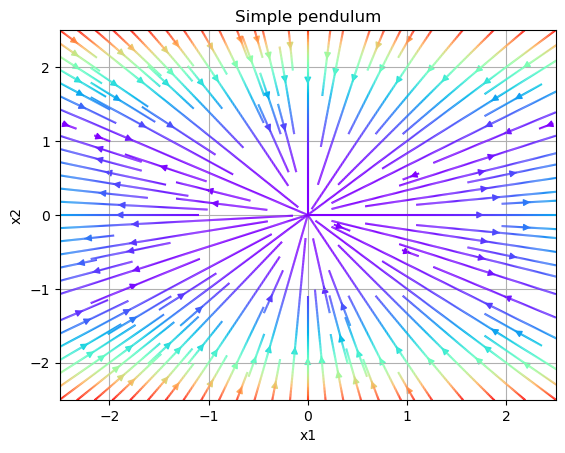

In [5]:
phaseportrait.PhasePortrait2D(
    lambda x1, x2: model([x1, x2], 0),
    [-2.5, 2.5],
    Title="Simple pendulum",
    xlabel=r"x1",
    ylabel=r"x2",
).plot()
plt.show()

In [6]:
x1, x2 = sp.symbols('x1 x2')
f = ((1/2)*x1 + 1*x2)*((-1/2)*x1 + 1*x2)
f.simplify()

-0.25*x1**2 + 1.0*x2**2

The system demonstrated above matches the observations, but as the formula shows it is not a linear system.

An LTI of the second order with an equilibria in the point $(-2, 1)$ can have the form:

$\begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = A \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

$\begin{bmatrix} 0 \\ 0 \end{bmatrix} = A \begin{bmatrix} -2 \\ 1 \end{bmatrix}$

One non-zero solution for A that converges is:

$A = \begin{bmatrix} -1/2 & -1 \\ -1 & -2 \end{bmatrix}$

The plot for this system is:

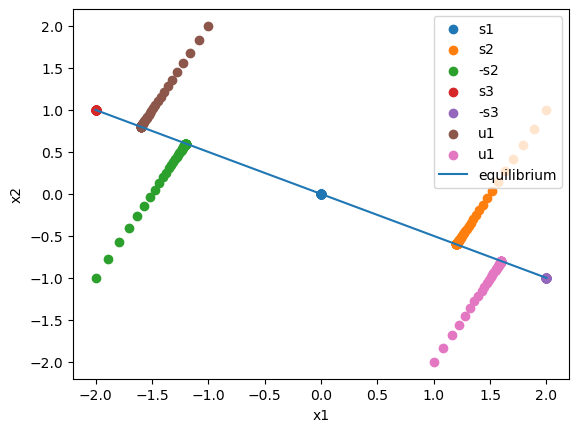

In [7]:
A = np.array([[-1/2, -1], [-1, -2]])

def model(x, t):
    dx = np.dot(A, x)
    return dx

t = np.linspace(0, 3)

def plot_for(x0, name):
    y = odeint(model, x0, t)
    plt.scatter(y[:,0], y[:,1], label=name)

plot_for(s1, "s1")
plot_for(s2, "s2")
plot_for(-np.array(s2), "-s2")
plot_for(s3, "s3")
plot_for(-np.array(s3), "-s3")
plot_for(u1, "u1")
plot_for(-u1, "u1")
x1 = np.linspace(-2, 2)
x2 = (-1/2)*x1
plt.plot(x1, x2, label="equilibrium")
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The full phase portrait for this system confirms this observation:

c:\Users\noskn\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\noskn\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


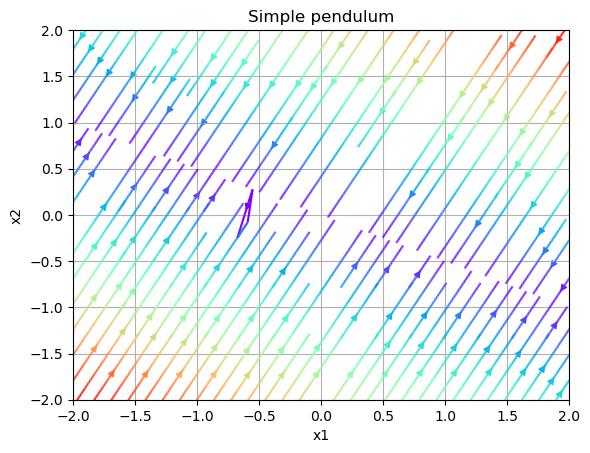

In [8]:
phaseportrait.PhasePortrait2D(
    lambda x1, x2: model([x1, x2], 0),
    [-2, 2],
    Title="Simple pendulum",
    xlabel=r"x1",
    ylabel=r"x2",
).plot()
plt.show()

In this system, all points converge on the equilibrium line. For LTI system, the equilibrium must form a line. It is impossible to create such a system that has such an equilibrium for both $(-2, 1)$ and $(2, 1)$. For that reason, the original second order system is non-linear, and therefore is not an LTI.
- Lecture 107 Equilibria for LTI systems

## Q4

An LTI system, $\dot{x} = Ax + Bu$ has isolated equilibria if and only if $rank(A) = dim(A)$. This is because the rank of A is the number of linearly independent rows or columns in A, and the dimension of A is the number of rows or columns in A. If the rank is less than the dimension, then there are rows or columns that are linearly dependent, and therefore the system is not invertible and has $det(A) = 0$. If the system is not invertible, then there are infinite solutions to the system, and therefore there are infinite equilibria. For $rank(A)<dim(A)=2$ there will be infinite equilibria following a line that passes through the origin $(0, 0)$. For $rank(A)=dim(A)=\real$ however, there will only be exactly one equilibrium at the origin. An isolated equilibrium is a point that is not directly surrounded by other equilibria.

If $B$ and $u$ are not zero, the equilibria will be moved from the origin to the point $A(-Bu)$.

## Q5

At $y(t)<2$ this system has a $\dot{y}(t)<0$. This remains the case until the equilibrium at $(0, 0)$ or $y(0)=0$. The system will therefore converge on the point $(0, 0)$.

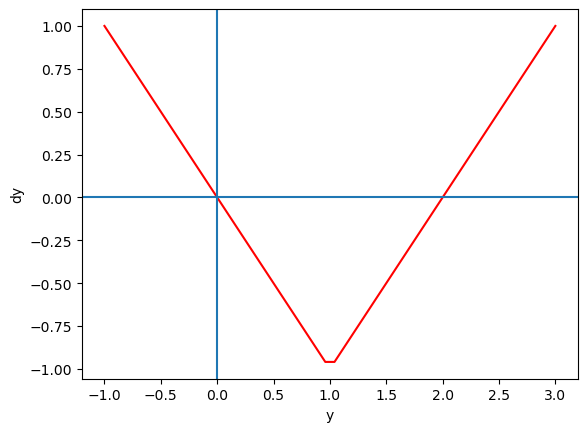

In [9]:
def model(y, t):
    dy = y-2 if y >= 1 else -y
    return dy

plt.figure(1)
t = np.linspace(-1, 3)
plt.plot(t, [model(y, 0) for y in t], color="r")
plt.xlabel('y')
plt.ylabel('dy')
plt.axhline()
plt.axvline()
plt.show()

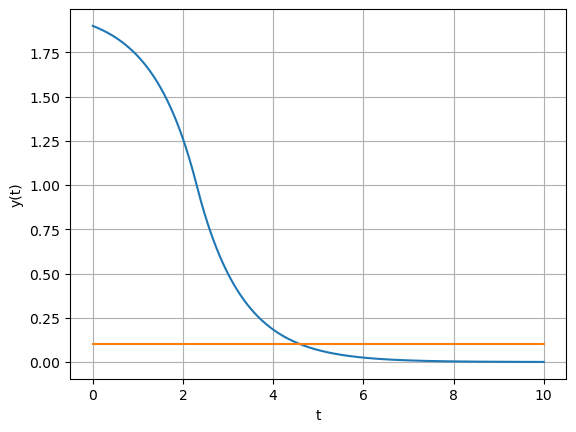

In [10]:
t = np.linspace(0, 10, 1000)
y0 = 1.9
y = odeint(model, y0, t)[:,0]

plt.plot(t, y)
plt.plot(t, np.ones(len(t))*0.1)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

In [11]:
for time, value in zip(t, y):
    if value <= 0.1:
        print("The system reaches within 0.1 of the equilibrium at:")
        print(f"t={time:.3f}")
        print(f"y={value:.3f}")
        break

The system reaches within 0.1 of the equilibrium at:
t=4.615
y=0.099
